In [1]:

import requests
import json
from pprint import pprint
import os
import pandas as pd
import numpy as np

In [2]:
# TODO: at the end turn each section/task into a different file/module, so keep only main/high_lvl parts in this file.

In [3]:
# TODO: get node_list & edge_list from the server
# XXX: take the "node-light" version

res_node_list = requests.get(
    # url="https://archmanucox.pythonanywhere.com/bimverse/nodes-light.json/"
    # url="https://archmanucox.pythonanywhere.com/bimverse/nodes-light/?format=json&project=--none--"
    url="https://archmanucox.pythonanywhere.com/bimverse/nodes-light/?format=json&project=snowdontowers"
)

res_edge_list = requests.get(
    # url="https://archmanucox.pythonanywhere.com/bimverse/edges.json/"
    # url="https://archmanucox.pythonanywhere.com/bimverse/edges/?format=json&project=--none--"
    url="https://archmanucox.pythonanywhere.com/bimverse/edges/?format=json&project=snowdontowers"
)

# response_unserial = json.loads(response.json())
# response_unserial = response.json().load

# pprint(response.json()[0])
# print(response_unserial)

data = os.path.join("data", "")
addr_node_list = data + "node_list"
addr_edge_list = data + "edge_list"

# with open(addr_node_list, 'w') as f:
#     json.dump(res_node_list.json(), f)

# TODO: make the node_list & edge_list (for networkx/igraph)

df_node_list = pd.DataFrame(columns=res_node_list.json()[0].keys())
df_edge_list = pd.DataFrame(columns=res_edge_list.json()[0].keys())
#  print(df)

for item in res_node_list.json():
    df_node_list.loc[item.get('id')] = item.values()

for item in res_edge_list.json():
    df_edge_list.loc[item.get('id')] = item.values()

df_node_list = df_node_list.rename({'name': 'label'}, axis=1)
# df_node_list = df_node_list.drop('id', axis=1)

df_node_list.to_csv(addr_node_list + '.csv', index=0)
display(df_node_list)

df_edge_list = df_edge_list.rename({'name': 'kind', 'nodeObject_from': 'source', 'nodeObject_to': 'target'}, axis=1)
# df_edge_list = df_edge_list.drop('id', axis=1)
df_edge_list['label'] = df_edge_list['kind']
df_edge_list['type'] = 'directed'
df_edge_list['weight'] = 1.0

df_node_list.to_csv(addr_edge_list + '.csv', index=0)
display(df_edge_list)

#TODO: create a graph (e.g., networkX), BOn server requests



# TODO: do SNA analysis (e.g., centralities) on the network

# TODO: Visualize the restulsts (e.g., node_size: betweenness)
# TODO: export each of them to a ".png" file




,id,project,label,identifier,enabled,data,modularClassTags,geometryObjects,nodeObject_to,nodeObject_from
315,315,snowdontowers,room,46ec4172-06ee-4490-8b81-5cb4f0c7c011_826376,True,"{'Name': 'Stair', 'Number': 'S1'}",[room],[https://archmanucox.pythonanywhere.com/bimver...,"[{'name': 'level', 'nodeObject_to': 375}]","[{'name': 'room_connected', 'nodeObject_from':..."
316,316,snowdontowers,room,46ec4172-06ee-4490-8b81-5cb4f0c7c011_826593,True,"{'Name': 'Stair', 'Number': 'S3'}",[room],[https://archmanucox.pythonanywhere.com/bimver...,"[{'name': 'level', 'nodeObject_to': 376}]","[{'name': 'room_connected', 'nodeObject_from':..."
317,317,snowdontowers,room,46ec4172-06ee-4490-8b81-5cb4f0c7c011_826600,True,"{'Name': 'Stair', 'Number': 'S2'}",[room],[https://archmanucox.pythonanywhere.com/bimver...,"[{'name': 'level', 'nodeObject_to': 385}]","[{'name': 'room_connected', 'nodeObject_from':..."
318,318,snowdontowers,room,46ec4172-06ee-4490-8b81-5cb4f0c7c011_826702,True,"{'Name': 'Elevator', 'Number': 'E1'}",[room],[https://archmanucox.pythonanywhere.com/bimver...,"[{'name': 'level', 'nodeObject_to': 382}]",[]
319,319,snowdontowers,room,46ec4172-06ee-4490-8b81-5cb4f0c7c011_826708,True,"{'Name': 'Elevator', 'Number': 'E2'}",[room],[https://archmanucox.pythonanywhere.com/bimver...,"[{'name': 'level', 'nodeObject_to': 385}]",[]
...,...,...,...,...,...,...,...,...,...,...
882,882,snowdontowers,room,46ec4172-06ee-4490-8b81-5cb4f0c7c011_2177792,True,"{'Area': 848.5490451389, 'Name': 'Mezzanine Di...",[room],[https://archmanucox.pythonanywhere.com/bimver...,[],[]
883,883,snowdontowers,room,46ec4172-06ee-4490-8b81-5cb4f0c7c011_2181757,True,"{'Area': 5177.4925191991, 'Name': 'Green Roof'...",[room],[https://archmanucox.pythonanywhere.com/bimver...,[],[]
884,884,snowdontowers,room,46ec4172-06ee-4490-8b81-5cb4f0c7c011_2181762,True,"{'Area': 734.1611110296, 'Name': 'Bandstand', ...",[room],[https://archmanucox.pythonanywhere.com/bimver...,[],[]
885,885,snowdontowers,room,46ec4172-06ee-4490-8b81-5cb4f0c7c011_2181766,True,"{'Area': 115.7447374132, 'Name': 'Storage', 'N...",[room],[https://archmanucox.pythonanywhere.com/bimver...,[],[]


,id,project,kind,identifier,enabled,source,target,label,type,weight
41,41,snowdontowers,level,----,False,315,375,level,directed,1.0
42,42,snowdontowers,level,----,True,316,376,level,directed,1.0
43,43,snowdontowers,level,----,True,317,385,level,directed,1.0
44,44,snowdontowers,level,----,True,318,382,level,directed,1.0
45,45,snowdontowers,level,----,True,319,385,level,directed,1.0
...,...,...,...,...,...,...,...,...,...,...
767,767,snowdontowers,room_connected,----,True,365,316,room_connected,directed,1.0
768,768,snowdontowers,room_connected,----,True,337,337,room_connected,directed,1.0
769,769,snowdontowers,room_connected,----,True,346,346,room_connected,directed,1.0
770,770,snowdontowers,room_connected,----,True,354,354,room_connected,directed,1.0


In [4]:
import matplotlib.pyplot as plt

import numpy as np
import pandas as pd
pd.set_option("display.max_rows", 10)
from sklearn.preprocessing import MinMaxScaler

import seaborn as sns
from pprint import pprint

import igraph as ig
import networkx as nx
from math import floor, log
import os

# get data/time with desired format
from datetime import datetime, timedelta
from time import time

time_format = "%Y.%m.%d@%H-%M-%S"

In [5]:
SAVE_OUTPUTS = False  # values: True or False
CITY = 'kish'  # values: 'ideal', 'tehran', 'kish'
TEMPORAL = '3'  # values: '1', '2', '3'
TEMPORAL_VER = '1'  # values: '1', '2', etc.
EDGE_TYPE = 'directed'  # values: 'undirected', 'directed
PRUNE_EDGES = True  # should the edges get pruned? (e.g., BOn betweenness_HPI_minmax)

# Define the name of the outputs (for filenames)
network_name = f'Temporal{TEMPORAL}_{EDGE_TYPE}_ver{TEMPORAL_VER}_{CITY}'
network_name

'Temporal3_directed_ver1_kish'

## Create Graph (from pd.DataFrame) (NetworkX)

In [6]:
# Set the timestamp (for file saving)
timestamp = datetime.today().strftime(time_format)

# Create a graph by module edge list
if EDGE_TYPE.lower() == 'undirected':
    G = nx.from_pandas_edgelist(df_edge_list, source='source', target='target', edge_attr=['weight', 'kind', 'label', 'type'])
if EDGE_TYPE.lower() == 'directed':
    G = nx.from_pandas_edgelist(df_edge_list, source='source', target='target', edge_attr=True, create_using=nx.DiGraph)

In [7]:
print(f'{nx.is_directed(G) = }')
print(f'{len(G.nodes) = }')
print(f'{len(G.edges) = }')

nx.is_directed(G) = True
len(G.nodes) = 514
len(G.edges) = 731


In [8]:
# Add the node features to the graph
for col in (col for col in df_node_list.columns if col not in ['id']):
    nx.set_node_attributes(G, pd.Series(df_node_list[col], index=df_node_list.index).to_dict(), col)

# TODO: Ankify
G.nodes.data(True)

NodeDataView({315: {'project': 'snowdontowers', 'label': 'room', 'identifier': '46ec4172-06ee-4490-8b81-5cb4f0c7c011_826376', 'enabled': True, 'data': {'Name': 'Stair', 'Number': 'S1'}, 'modularClassTags': ['room'], 'geometryObjects': ['https://archmanucox.pythonanywhere.com/bimverse/geometries/155/?format=json'], 'nodeObject_to': [{'name': 'level', 'nodeObject_to': 375}], 'nodeObject_from': [{'name': 'room_connected', 'nodeObject_from': 358}, {'name': 'room_connected', 'nodeObject_from': 342}, {'name': 'room_connected', 'nodeObject_from': 334}, {'name': 'room_connected', 'nodeObject_from': 351}, {'name': 'room_connected', 'nodeObject_from': 365}]}, 375: {'project': 'snowdontowers', 'label': 'level', 'identifier': '46ec4172-06ee-4490-8b81-5cb4f0c7c011_593176', 'enabled': True, 'data': {'Name': 'L1 - Block 35'}, 'modularClassTags': ['level'], 'geometryObjects': ['https://archmanucox.pythonanywhere.com/bimverse/geometries/215/?format=json'], 'nodeObject_to': [{'name': 'level_adjacent', '

In [9]:
for node_id, degree in G.degree():
    if degree == 0:
        G.remove_node(node_id)

print(f'#nodes after cleaning: {len(G.nodes)}')
print(f'#edges after cleaning: {len(G.edges)}')

#nodes after cleaning: 514
#edges after cleaning: 731


In [10]:
# make level-to-level edges bidirectional

edge_labels = nx.get_edge_attributes(G, 'label')
edges_to_be_added = []

for source, target in G.edges:
    source_type = nx.get_node_attributes(G, 'label')[source]
    target_type = nx.get_node_attributes(G, 'label')[target]
    if source_type == target_type and source != target:
        label = edge_labels[(source, target)]
        # G.add_edge(target, source, label=label)
        edges_to_be_added.append((target, source, {'label': label}))
        print(f"new added edge: {source, source_type, target, target_type, label}")

G.add_edges_from(edges_to_be_added)

new added edge: (375, 'level', 385, 'level', 'level_adjacent')
new added edge: (376, 'level', 374, 'level', 'level_adjacent')
new added edge: (385, 'level', 373, 'level', 'level_adjacent')
new added edge: (382, 'level', 375, 'level', 'level_adjacent')
new added edge: (320, 'room', 321, 'room', 'room_connected')
new added edge: (323, 'room', 320, 'room', 'room_connected')
new added edge: (325, 'room', 326, 'room', 'room_connected')
new added edge: (373, 'level', 388, 'level', 'level_adjacent')
new added edge: (329, 'room', 316, 'room', 'room_connected')
new added edge: (329, 'room', 330, 'room', 'room_connected')
new added edge: (329, 'room', 333, 'room', 'room_connected')
new added edge: (329, 'room', 331, 'room', 'room_connected')
new added edge: (329, 'room', 332, 'room', 'room_connected')
new added edge: (334, 'room', 315, 'room', 'room_connected')
new added edge: (374, 'level', 377, 'level', 'level_adjacent')
new added edge: (335, 'room', 316, 'room', 'room_connected')
new added ed

## Calcute the degree + store it as a node attribute

In [11]:
degree_dict = {idx:degree for idx, degree in dict(G.degree(weight='weight')).items()}
nx.set_node_attributes(G, degree_dict, 'degree_weighted')
print(nx.get_node_attributes(G, 'degree_weighted'))

{315: 11.0, 375: 36.0, 316: 13.0, 376: 79.0, 317: 5.0, 385: 49.0, 318: 1.0, 382: 52.0, 319: 1.0, 320: 5.0, 321: 3.0, 322: 1.0, 323: 3.0, 324: 1.0, 325: 3.0, 326: 3.0, 327: 1.0, 373: 25.0, 328: 1.0, 329: 11.0, 330: 5.0, 331: 5.0, 332: 5.0, 333: 5.0, 334: 3.0, 374: 96.0, 335: 15.0, 336: 5.0, 337: 5.0, 338: 5.0, 339: 5.0, 340: 5.0, 341: 5.0, 342: 3.0, 377: 110.0, 343: 5.0, 344: 19.0, 345: 5.0, 346: 5.0, 347: 5.0, 348: 5.0, 349: 5.0, 350: 5.0, 351: 3.0, 378: 63.0, 352: 9.0, 353: 1.0, 354: 5.0, 355: 1.0, 356: 5.0, 357: 5.0, 358: 15.0, 359: 3.0, 360: 3.0, 361: 3.0, 362: 3.0, 363: 5.0, 364: 1.0, 365: 9.0, 390: 8.0, 366: 1.0, 367: 3.0, 368: 1.0, 391: 1.0, 392: 1.0, 393: 1.0, 394: 1.0, 395: 1.0, 396: 1.0, 397: 1.0, 398: 1.0, 399: 1.0, 400: 1.0, 401: 1.0, 402: 2.0, 403: 1.0, 404: 1.0, 405: 3.0, 406: 6.0, 407: 1.0, 408: 1.0, 409: 2.0, 410: 1.0, 411: 4.0, 412: 1.0, 413: 2.0, 414: 1.0, 415: 1.0, 416: 1.0, 417: 1.0, 418: 1.0, 419: 1.0, 420: 1.0, 421: 1.0, 422: 1.0, 423: 1.0, 424: 1.0, 425: 2.0, 426:

In [12]:
if EDGE_TYPE == 'directed':
    in_degree_dict = {idx:degree for idx, degree in dict(G.in_degree).items()}
    nx.set_node_attributes(G, in_degree_dict, 'in_degree')
    print(nx.get_node_attributes(G, 'in_degree'))

{315: 5, 375: 34, 316: 6, 376: 77, 317: 2, 385: 47, 318: 0, 382: 51, 319: 0, 320: 2, 321: 1, 322: 0, 323: 1, 324: 0, 325: 1, 326: 1, 327: 0, 373: 23, 328: 0, 329: 5, 330: 2, 331: 2, 332: 2, 333: 2, 334: 1, 374: 94, 335: 7, 336: 2, 337: 2, 338: 2, 339: 2, 340: 2, 341: 2, 342: 1, 377: 108, 343: 2, 344: 9, 345: 2, 346: 2, 347: 2, 348: 2, 349: 2, 350: 2, 351: 1, 378: 61, 352: 4, 353: 0, 354: 2, 355: 0, 356: 2, 357: 2, 358: 7, 359: 1, 360: 1, 361: 1, 362: 1, 363: 2, 364: 0, 365: 4, 390: 6, 366: 0, 367: 1, 368: 0, 391: 0, 392: 0, 393: 0, 394: 0, 395: 0, 396: 0, 397: 0, 398: 0, 399: 0, 400: 0, 401: 0, 402: 1, 403: 0, 404: 0, 405: 2, 406: 5, 407: 0, 408: 0, 409: 1, 410: 0, 411: 3, 412: 0, 413: 1, 414: 0, 415: 0, 416: 0, 417: 0, 418: 0, 419: 0, 420: 0, 421: 0, 422: 0, 423: 0, 424: 0, 425: 1, 426: 0, 427: 0, 428: 0, 429: 2, 430: 0, 431: 0, 432: 0, 433: 0, 434: 0, 435: 0, 436: 0, 437: 0, 438: 0, 439: 1, 440: 0, 441: 0, 442: 0, 443: 0, 444: 0, 445: 0, 446: 1, 447: 0, 448: 0, 449: 0, 450: 0, 451: 1

In [13]:
if EDGE_TYPE == 'directed':
    out_degree_dict = {idx:degree for idx, degree in dict(G.out_degree).items()}
    nx.set_node_attributes(G, out_degree_dict, 'out_degree')
    print(nx.get_node_attributes(G, 'out_degree'))

{315: 6, 375: 2, 316: 7, 376: 2, 317: 3, 385: 2, 318: 1, 382: 1, 319: 1, 320: 3, 321: 2, 322: 1, 323: 2, 324: 1, 325: 2, 326: 2, 327: 1, 373: 2, 328: 1, 329: 6, 330: 3, 331: 3, 332: 3, 333: 3, 334: 2, 374: 2, 335: 8, 336: 3, 337: 3, 338: 3, 339: 3, 340: 3, 341: 3, 342: 2, 377: 2, 343: 3, 344: 10, 345: 3, 346: 3, 347: 3, 348: 3, 349: 3, 350: 3, 351: 2, 378: 2, 352: 5, 353: 1, 354: 3, 355: 1, 356: 3, 357: 3, 358: 8, 359: 2, 360: 2, 361: 2, 362: 2, 363: 3, 364: 1, 365: 5, 390: 2, 366: 1, 367: 2, 368: 1, 391: 1, 392: 1, 393: 1, 394: 1, 395: 1, 396: 1, 397: 1, 398: 1, 399: 1, 400: 1, 401: 1, 402: 1, 403: 1, 404: 1, 405: 1, 406: 1, 407: 1, 408: 1, 409: 1, 410: 1, 411: 1, 412: 1, 413: 1, 414: 1, 415: 1, 416: 1, 417: 1, 418: 1, 419: 1, 420: 1, 421: 1, 422: 1, 423: 1, 424: 1, 425: 1, 426: 1, 427: 1, 428: 1, 429: 1, 430: 1, 431: 1, 432: 1, 433: 1, 434: 1, 435: 1, 436: 1, 437: 1, 438: 1, 439: 1, 440: 1, 441: 1, 442: 1, 443: 1, 444: 1, 445: 1, 446: 1, 447: 1, 448: 1, 449: 1, 450: 1, 451: 1, 452: 1

## Calculate Centerality measures (NetworkX)

In [14]:
# TODO: Ankify
# Reverse weights to represent disimiarity (rather than similarity)
# inversed_weights = list(map(lambda x, y: 1 / x, dict(nx.get_edge_attributes(G, 'weight')).values()))
inversed_weights = {idx:1/value for idx, value in dict(nx.get_edge_attributes(G, 'weight')).items()}
nx.set_edge_attributes(G, inversed_weights, 'weight_inversed')
# print(nx.get_edge_attributes(G, 'weight'))
print(nx.get_edge_attributes(G, 'weight_inversed'))

{(315, 375): 1.0, (375, 385): 1.0, (316, 376): 1.0, (376, 374): 1.0, (317, 385): 1.0, (385, 373): 1.0, (318, 382): 1.0, (382, 375): 1.0, (319, 385): 1.0, (320, 375): 1.0, (320, 321): 1.0, (321, 375): 1.0, (322, 375): 1.0, (323, 375): 1.0, (323, 320): 1.0, (324, 385): 1.0, (325, 385): 1.0, (325, 326): 1.0, (326, 385): 1.0, (327, 373): 1.0, (373, 388): 1.0, (328, 373): 1.0, (329, 376): 1.0, (329, 316): 1.0, (329, 330): 1.0, (329, 333): 1.0, (329, 331): 1.0, (329, 332): 1.0, (330, 376): 1.0, (330, 330): 1.0, (331, 376): 1.0, (331, 331): 1.0, (332, 376): 1.0, (332, 332): 1.0, (333, 376): 1.0, (333, 333): 1.0, (334, 374): 1.0, (334, 315): 1.0, (374, 377): 1.0, (335, 374): 1.0, (335, 316): 1.0, (335, 336): 1.0, (335, 339): 1.0, (335, 338): 1.0, (335, 340): 1.0, (335, 341): 1.0, (335, 337): 1.0, (336, 374): 1.0, (336, 336): 1.0, (337, 374): 1.0, (337, 337): 1.0, (338, 374): 1.0, (338, 338): 1.0, (339, 374): 1.0, (339, 339): 1.0, (340, 374): 1.0, (340, 340): 1.0, (341, 374): 1.0, (341, 341): 1

In [15]:
# TODO: normalize
eb = nx.edge_betweenness_centrality(G, weight='weight_inversed', normalized=True)
nx.set_edge_attributes(G, eb, "betweenness")
eb_min = min(eb.values())
eb_max = max(eb.values())
eb_minmax = {idx:(value - eb_min)/(eb_max - eb_min + 1e-7) for idx, value in eb.items()}
nx.set_edge_attributes(G, eb_minmax, "betweenness_minmax")

# node degree (normalized)
nd = nx.degree_centrality(G)
nx.set_node_attributes(G, nd, "degree_normal")

# node betweenness
nb = nx.betweenness_centrality(G, weight='weight_inversed', normalized=True)
nx.set_node_attributes(G, nb, "betweenness")
nb_min = min(nb.values())
nb_max = max(nb.values())
nb_minmax = {idx:(value - nb_min)/(nb_max - nb_min + 1e-7) for idx, value in nb.items()}
nx.set_node_attributes(G, nb_minmax, "betweenness_minmax")

# node closeness
nc = nx.closeness_centrality(G, distance='weight_inversed')
nx.set_node_attributes(G, nc, "closeness")
nc_min = min(nc.values())
nc_max = max(nc.values())
nc_minmax = {idx:(value - nc_min)/(nc_max - nc_min + 1e-7) for idx, value in nc.items()}
nx.set_node_attributes(G, nc_minmax, "closeness_minmax")

# node harmonic
nh = nx.harmonic_centrality(G, distance='weight_inversed')
nx.set_node_attributes(G, nh, "harmonic")
nh_min = min(nh.values())
nh_max = max(nh.values())
nh_minmax = {idx:(value - nh_min)/(nh_max - nh_min + 1e-7) for idx, value in nh.items()}
nx.set_node_attributes(G, nh_minmax, "harmonic_minmax")

# node eigenvector
ne = nx.eigenvector_centrality(G, weight='weight_inversed')
nx.set_node_attributes(G, ne, "eigenvector")
ne_min = min(ne.values())
ne_max = max(ne.values())
ne_minmax = {idx:(value - ne_min)/(ne_max - ne_min + 1e-7) for idx, value in ne.items()}
nx.set_node_attributes(G, ne_minmax, "eigenvector_minmax")

## Display all calculated centralities as table (actually DataFrame)

In [16]:
# create a Node list (DataFrame) with diff centralities

df_node_centrality = pd.DataFrame({
        'degree': list(dict(G.degree).values()),
        'degree_normal': list(nx.get_node_attributes(G, 'degree_normal').values()),
        'closeness': list(nx.get_node_attributes(G, 'closeness').values()),
        'closeness_minmax': list(nx.get_node_attributes(G, 'closeness_minmax').values()),
        'harmonic': list(nx.get_node_attributes(G, 'harmonic').values()),
        'harmonic_minmax': list(nx.get_node_attributes(G, 'harmonic_minmax').values()),
        'eigenvector': list(nx.get_node_attributes(G, 'eigenvector').values()),
        'eigenvector_minmax': list(nx.get_node_attributes(G, 'eigenvector_minmax').values()),
        'betweenness': list(nx.get_node_attributes(G, 'betweenness').values()),
        'betweenness_minmax': list(nx.get_node_attributes(G, 'betweenness_minmax').values()),
        # 'betweenness_BAI': list(nx.get_node_attributes(G, 'betweenness_BAI').values()),
        # 'betweenness_BAI_minmax': list(nx.get_node_attributes(G, 'betweenness_BAI_minmax').values()),
    },
    index=nx.get_node_attributes(G, 'label').values())

# sort the nodes by type of centrality
display(df_node_centrality)
export_path_node_centrality = os.path.join('outputs', 'tables', f'{timestamp} - {network_name} - node centerality.csv')
if SAVE_OUTPUTS:
    df_node_centrality.to_csv(export_path_node_centrality)

,degree,degree_normal,closeness,closeness_minmax,harmonic,harmonic_minmax,eigenvector,eigenvector_minmax,betweenness,betweenness_minmax
room,11,0.021442,0.023205,0.072511,15.083333,0.061116,1.023176e-01,0.203623,0.001142,0.067106
level,36,0.070175,0.209988,0.656160,168.293183,0.681903,7.066577e-02,0.140632,0.005753,0.338035
room,13,0.025341,0.037586,0.117447,21.000000,0.085089,2.737906e-01,0.544873,0.005199,0.305487
level,79,0.153996,0.311098,0.972104,224.742100,0.910627,2.696480e-01,0.536628,0.013774,0.809367
room,5,0.009747,0.022055,0.068915,13.083333,0.053012,8.045866e-02,0.160121,0.000182,0.010701
...,...,...,...,...,...,...,...,...,...,...
door,2,0.003899,0.000000,0.000000,0.000000,0.000000,9.635574e-35,0.000000,0.000000,0.000000
door,2,0.003899,0.000000,0.000000,0.000000,0.000000,9.635574e-35,0.000000,0.000000,0.000000
door,2,0.003899,0.000000,0.000000,0.000000,0.000000,9.635574e-35,0.000000,0.000000,0.000000
door,2,0.003899,0.000000,0.000000,0.000000,0.000000,9.635574e-35,0.000000,0.000000,0.000000


## Plot Centrality Pair-plots

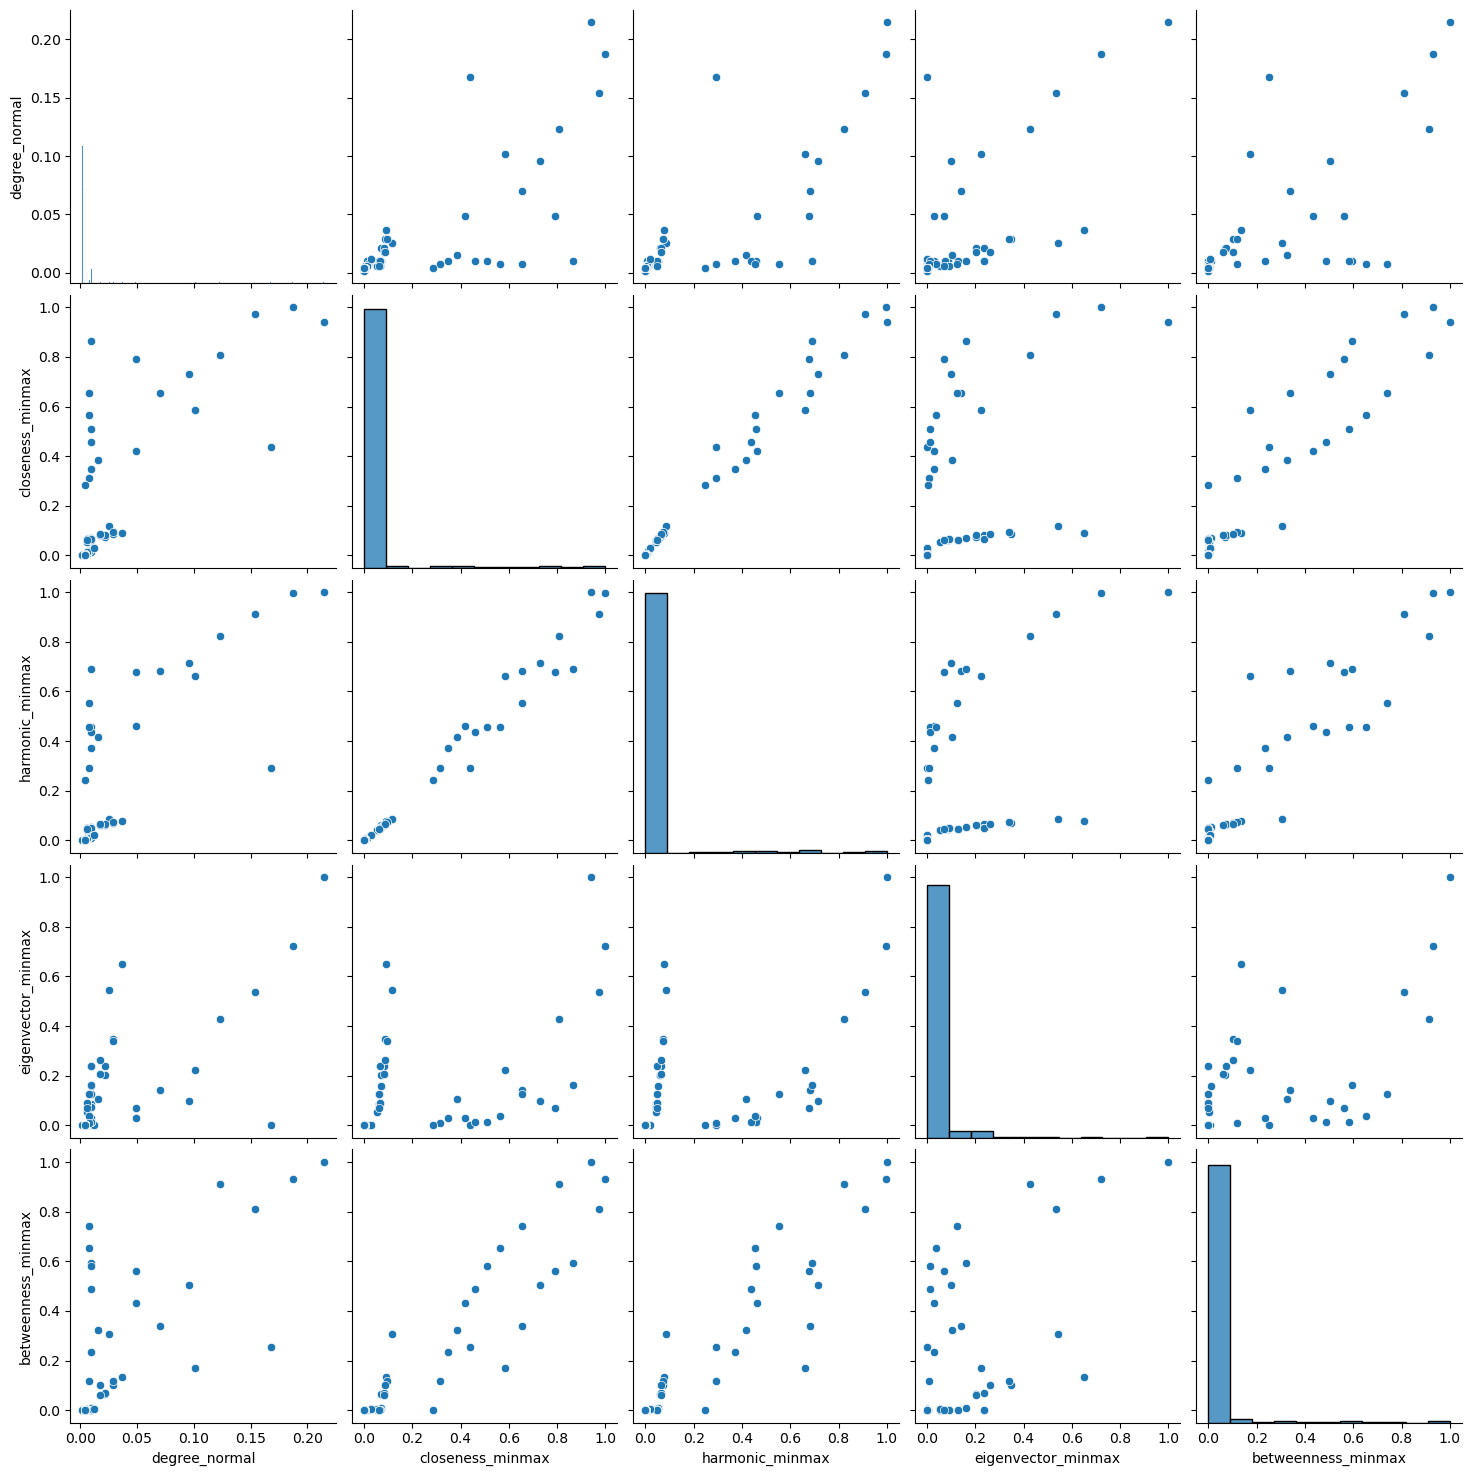

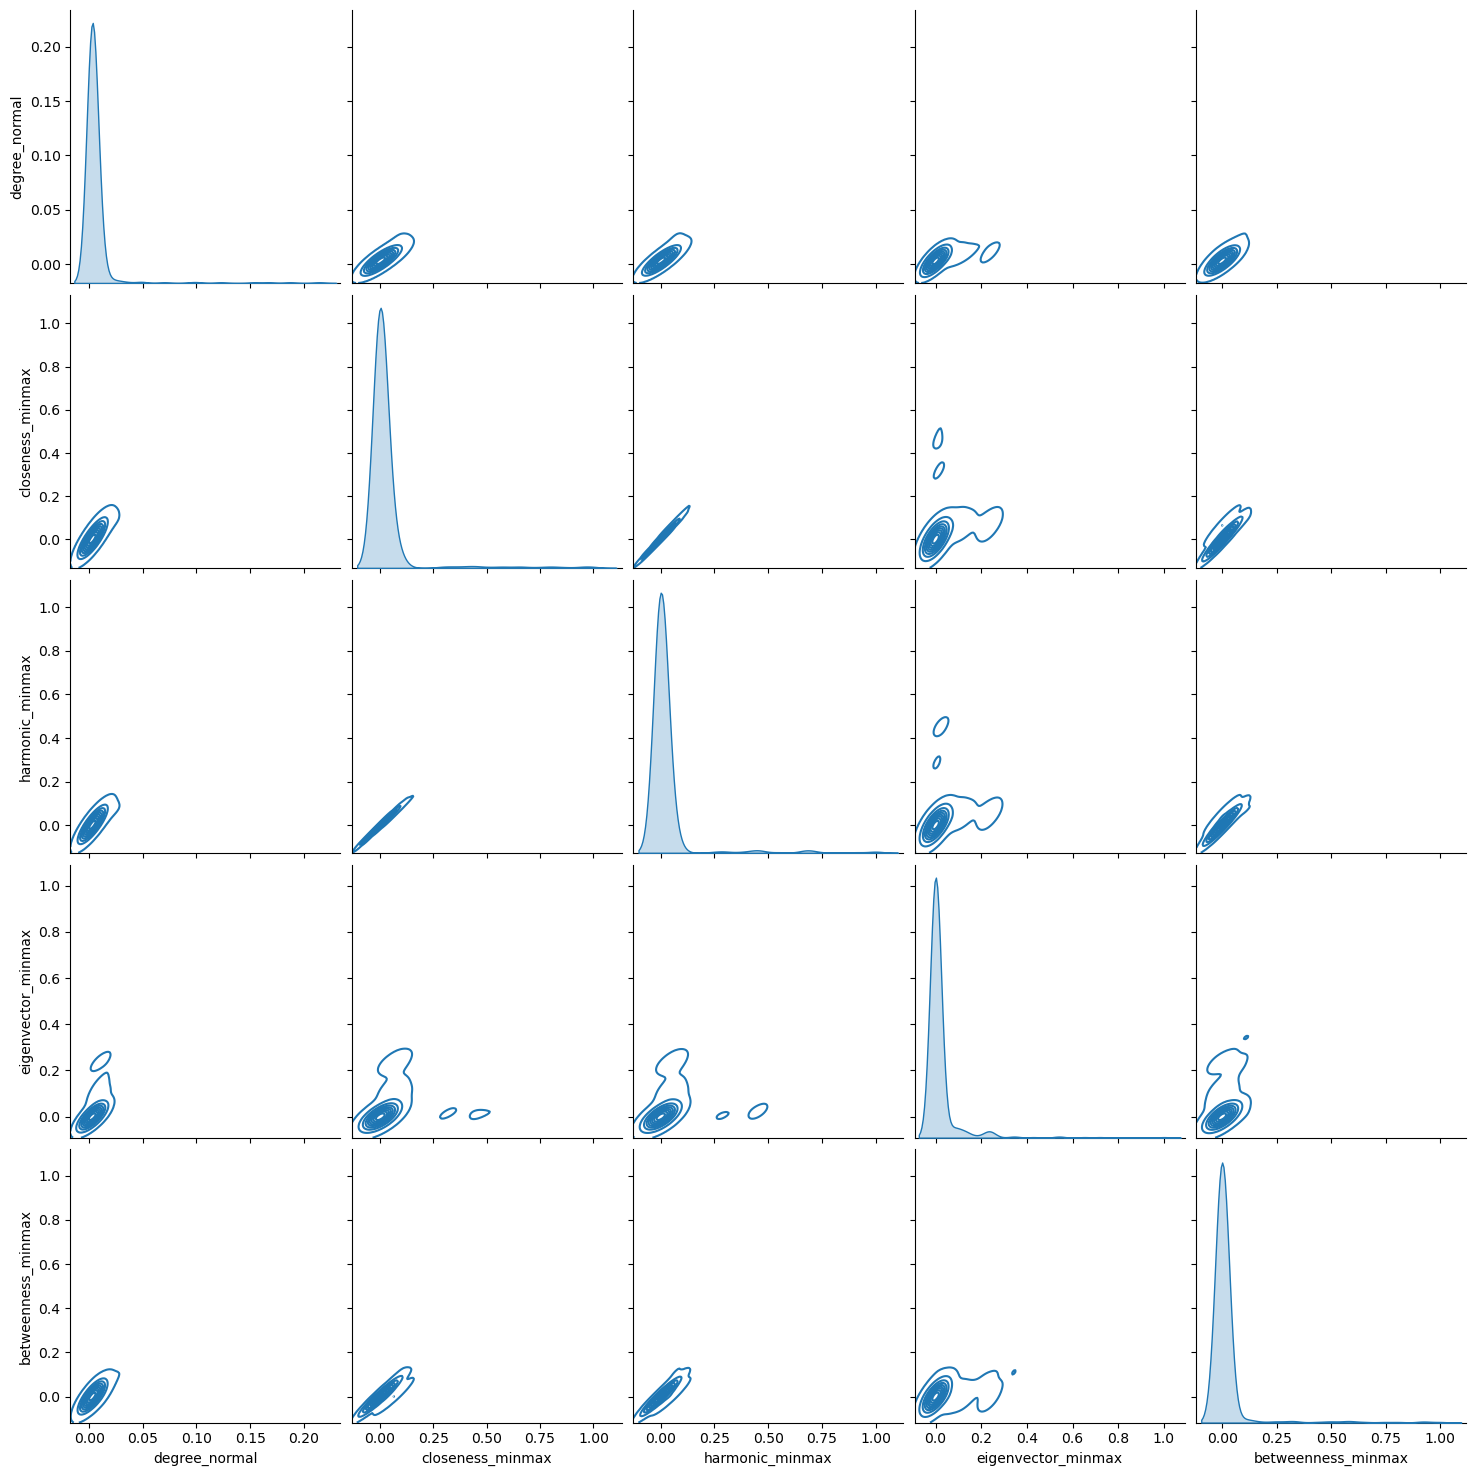

In [17]:
# plot correlation of nodes centralities
sns_plot = sns.pairplot(df_node_centrality[['degree_normal', 'closeness_minmax', 'harmonic_minmax', 'eigenvector_minmax', 'betweenness_minmax']], height=3)
export_path_node_centrality_pairplot = os.path.join('outputs', 'plots', f'{timestamp} - {network_name} - node centerality pairplot - normalized.pdf')
if SAVE_OUTPUTS:
    sns_plot.savefig(export_path_node_centrality_pairplot)
plt.show()

# KDE Plot is used for visualizing the Probability Density of a continuous variable.
sns_plot_kde = sns.pairplot(df_node_centrality[['degree_normal', 'closeness_minmax', 'harmonic_minmax', 'eigenvector_minmax', 'betweenness_minmax']], kind="kde", height=3)
export_path_node_centrality_pairplot_kde = os.path.join('outputs', 'plots', f'{timestamp} - {network_name} - node centerality pairplot(KDE) - normalized.pdf')
if SAVE_OUTPUTS:
    sns_plot_kde.savefig(export_path_node_centrality_pairplot_kde)
plt.show()

In [18]:
# create a Edge list (DataFrame) with diff centralities

df_edge_centrality = pd.DataFrame({
        'label': list(nx.get_edge_attributes(G, 'label').values()),
        'betweenness': list(nx.get_edge_attributes(G, 'betweenness').values()),
        'betweenness_minmax': list(nx.get_edge_attributes(G, 'betweenness_minmax').values()),
        # 'betweenness_HPI': list(nx.get_edge_attributes(G, 'betweenness_HPI').values()),
        # 'betweenness_HPI_minmax': list(nx.get_edge_attributes(G, 'betweenness_HPI_minmax').values()),
    },
    index=dict(G.edges).keys())

# sort the nodes by type of centrality
display(df_edge_centrality.sort_values('betweenness_minmax', axis=0, ascending=False))
export_path_edge_centrality = os.path.join('outputs', 'tables', f'{timestamp} - {network_name} - edge centerality.csv')
if SAVE_OUTPUTS:
    df_edge_centrality.to_csv(export_path_edge_centrality)

,,label,betweenness,betweenness_minmax
378,379,level_adjacent,0.013492,0.999993
377,378,level_adjacent,0.013061,0.968097
379,380,level_adjacent,0.011683,0.865909
374,377,level_adjacent,0.010797,0.800283
380,389,level_adjacent,0.010120,0.750107
...,...,...,...,...
345,345,room_connected,0.000000,0.000000
337,337,room_connected,0.000000,0.000000
356,356,room_connected,0.000000,0.000000
357,357,room_connected,0.000000,0.000000


## Save the Graph as a file (for Gephi)

In [19]:
#TODO: save the garph as .gml file
#TODO: use the timestamp in naming the file
export_path_graph = os.path.join('outputs', 'graphs', f'{timestamp} - {network_name}.graphml')
if SAVE_OUTPUTS:
    nx.write_graphml_lxml(G, path=export_path_graph)

## Visualize Graph

### Set Edge Color

### Kamada Kawai

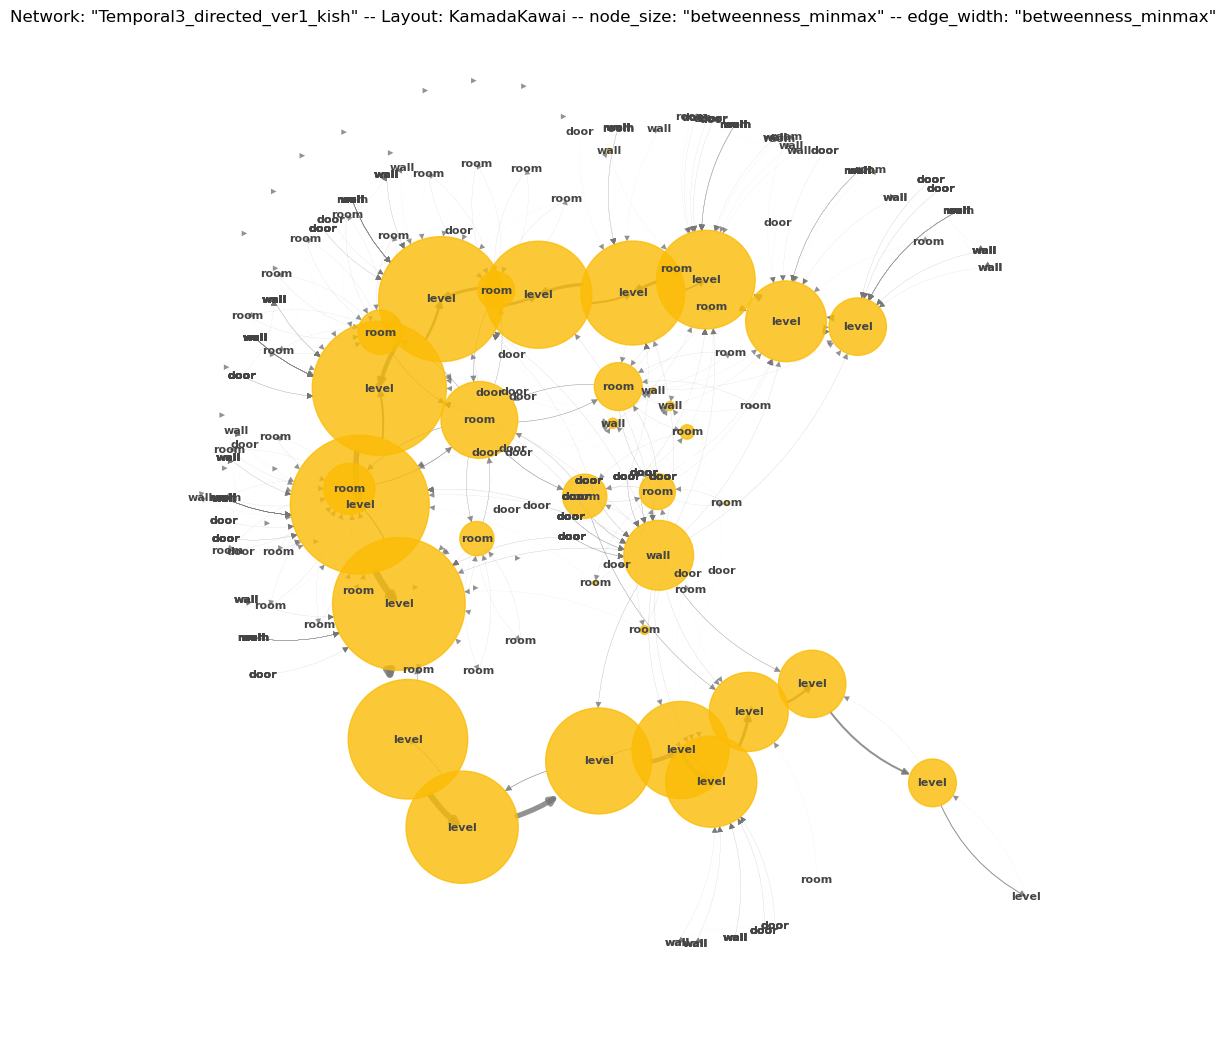

In [22]:
# Set the visualization layout Name
layout_name = 'KamadaKawai'

# set the node attr to determine node size
# e.g., 'betweenness_minmax', 'degree_normal', 'degree_weighted', 'level', etc.
node_size_attr = 'betweenness_minmax'
# node_size_attr = 'betweenness_BAI_minmax'

# set the edge attr to determine edge width
# e.g., 'betweenness_minmax', 'betweenness_HPI_minmax', etc.
edge_width_attr = 'betweenness_minmax'
# edge_width_attr = 'betweenness_HPI_minmax'

plt.figure(figsize=(10, 10))

# Draw the graph layout
nx.draw_kamada_kawai(G,
    # with_labels=True,
    node_size = [size*1e4 for size in list(nx.get_node_attributes(G, node_size_attr).values())],
    # node_color = list(nx.get_node_attributes(G, 'color').values()),
    node_color = "#FBBC05",
    node_shape = 'o',
    alpha= 0.8, # node and edge transparency
    edge_color = '#777',
    style='-',
    connectionstyle= 'arc3,rad=0.2',
    # edge_color = edge_color_list_nx,
    width = [between * 5 for between in list(nx.get_edge_attributes(G, edge_width_attr).values())],  # edge width
)

# Draw the labels
labels = nx.draw_networkx_labels(
    G,
    pos=nx.kamada_kawai_layout(G),
    # labels=nx.get_node_attributes(G, 'label_vis'),
    labels=nx.get_node_attributes(G, 'label'),
    font_color='#444',
    font_size=8, # int: universal (for nodes and edges)
    font_weight='bold',  # values: 'normal', 'bold',
    font_family='sans-serif',  # values: 'sans-serif’,
)

plt.title(f'Network: "{network_name}" -- Layout: {layout_name} -- node_size: "{node_size_attr}" -- edge_width: "{edge_width_attr}"')
# Export File
export_path_nx = os.path.join('outputs', 'visualizaion', f'{timestamp} - {network_name} - {layout_name} - nsize {node_size_attr} - ewidth {edge_width_attr}.pdf')
if SAVE_OUTPUTS:
    plt.savefig(export_path_nx, bbox_inches="tight")

plt.show()

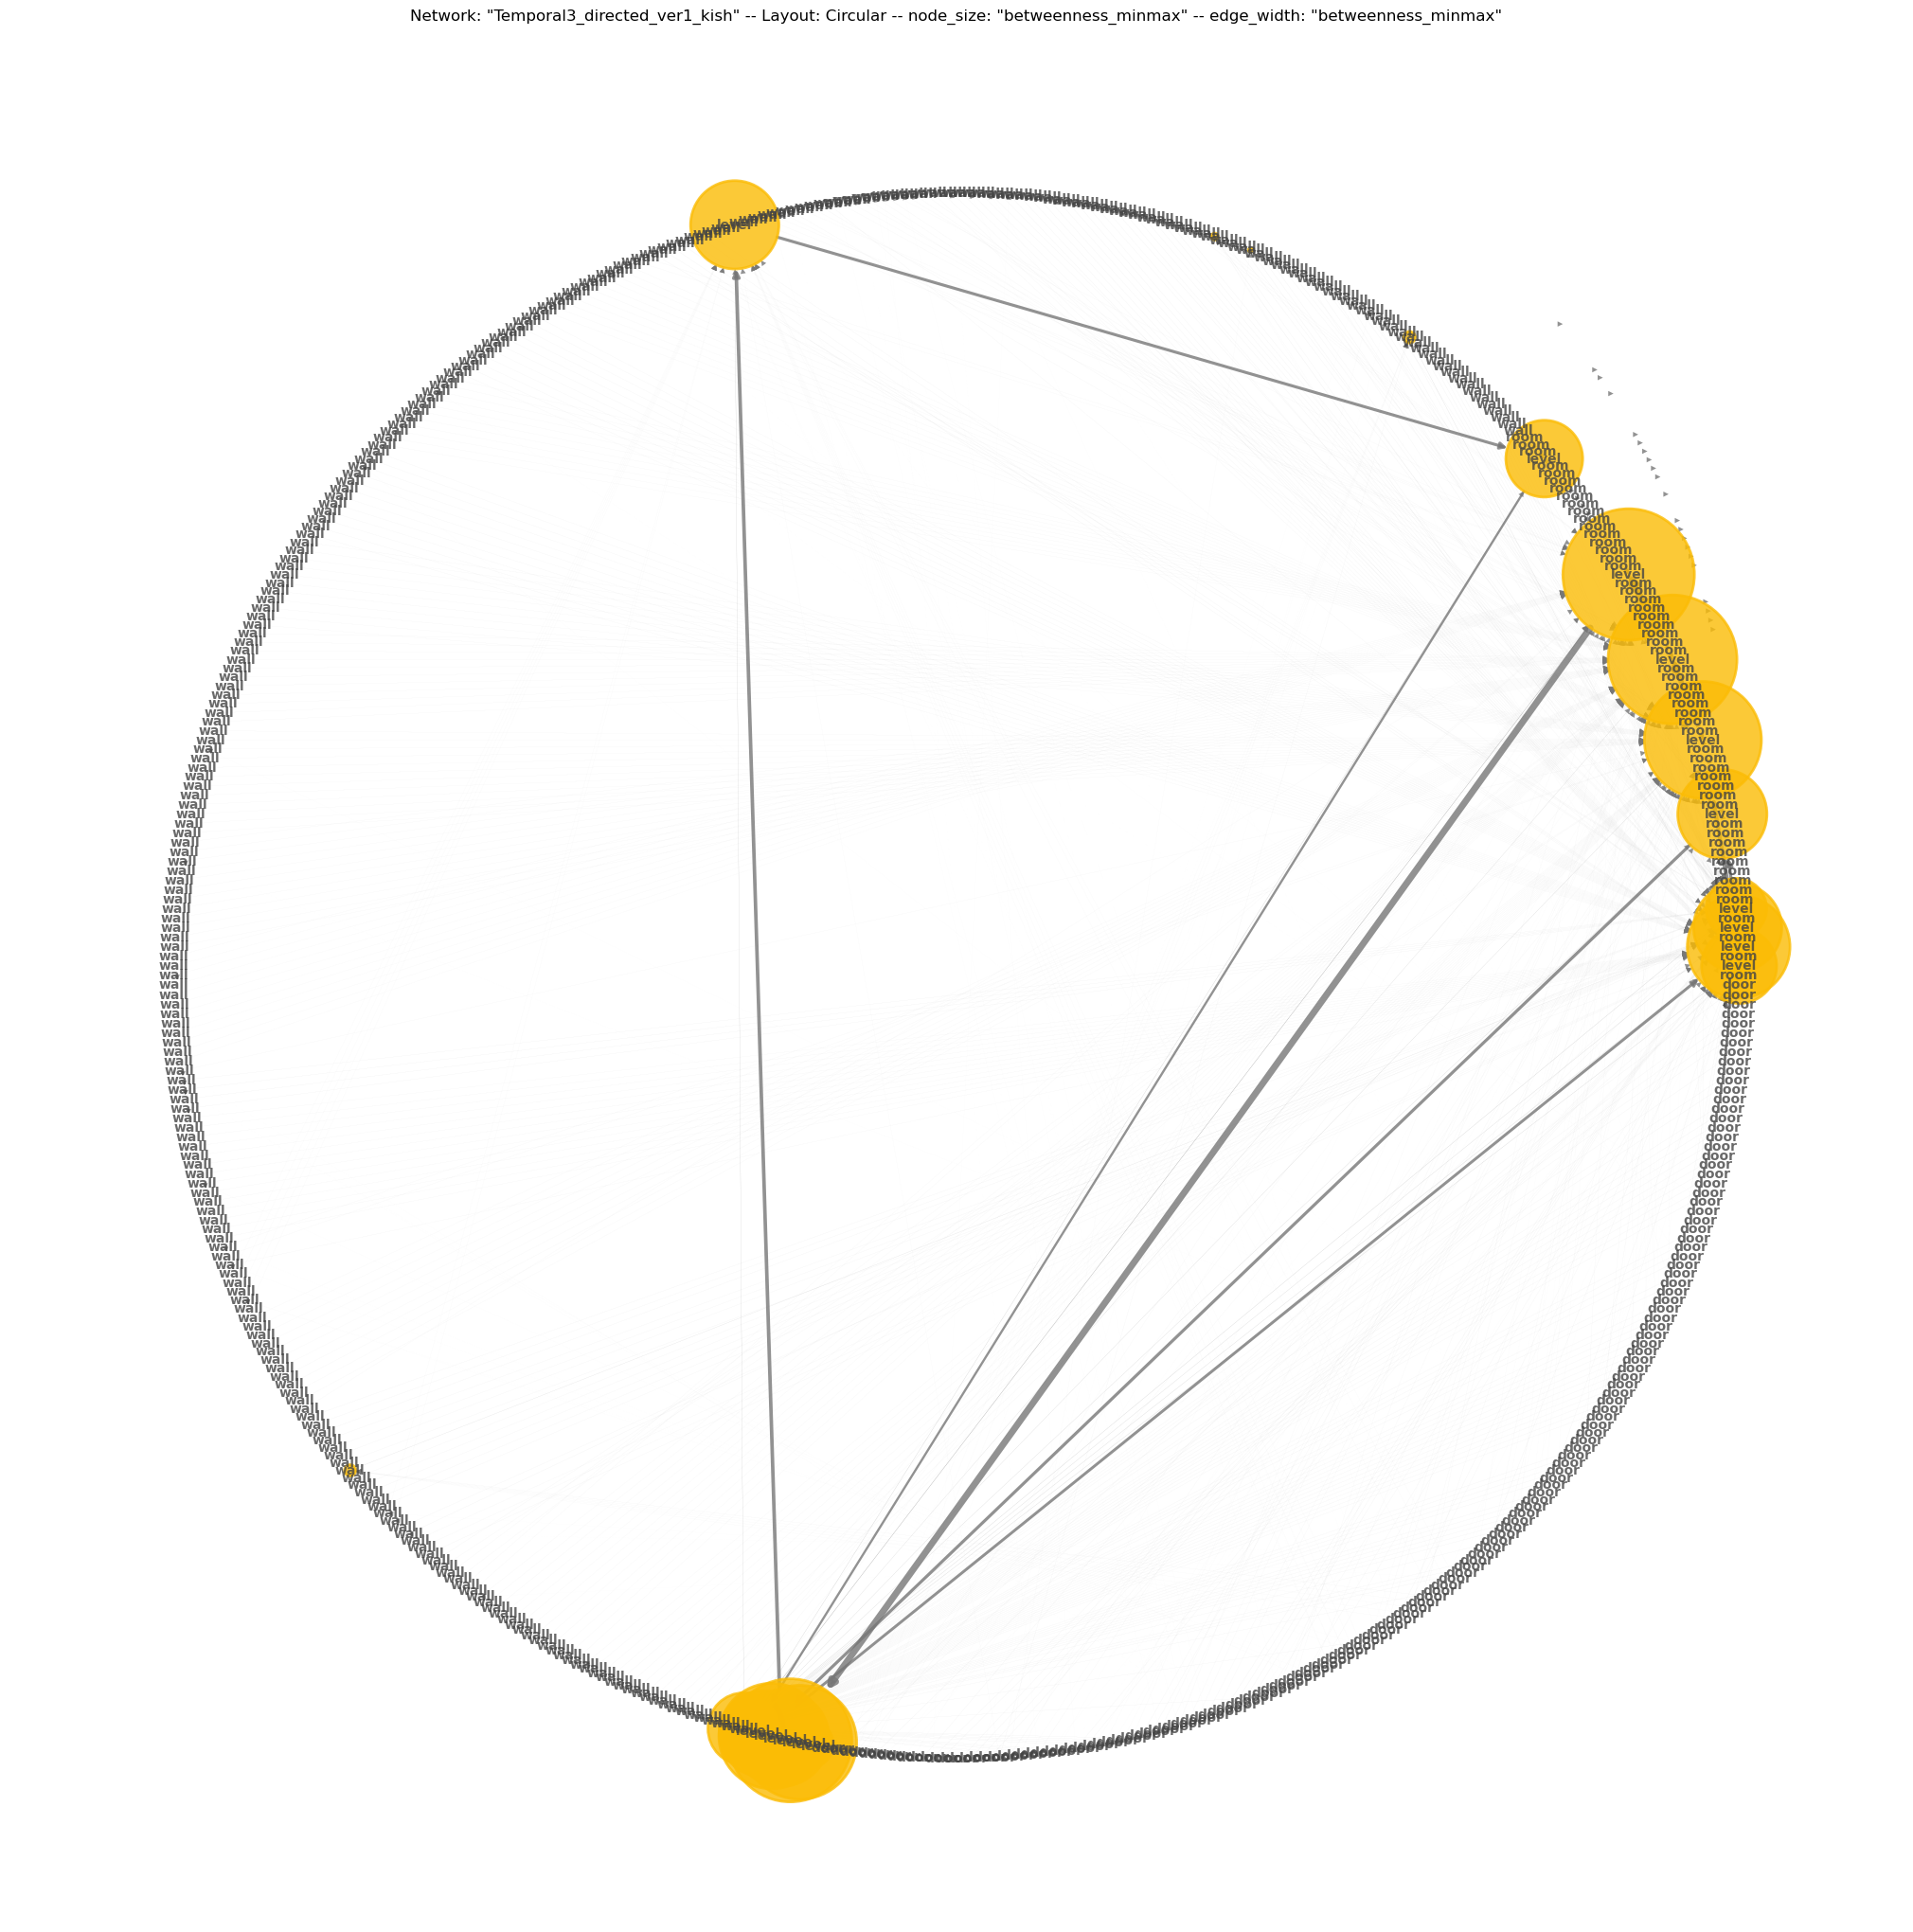

In [43]:
# --------------------------
# -- Circular
# --------------------------
pos = nx.circular_layout(G,
    dim=2,
)

# Set the visualization layout Name
layout_name = 'Circular'

# set the node attr to determine node size
# e.g., 'betweenness_minmax', 'degree_normal', 'degree_weighted', 'level', etc.
node_size_attr = 'betweenness_minmax'
# node_size_attr = 'betweenness_BAI_minmax'

# set the edge attr to determine edge width
# e.g., 'betweenness_minmax', 'betweenness_HPI_minmax', etc.
edge_width_attr = 'betweenness_minmax'
# edge_width_attr = 'betweenness_HPI_minmax'

# XXX: to increase the space between nodes, both horizontally and vertically, change figsize (changing the scale doesn't have an effect)
plt.figure(figsize=(20, 20))

nx.draw(G,
    pos=pos, # position of the nodes
    alpha= 0.8, # node and edge transparency
    # node attributes
    node_size = [size*1e4 for size in list(nx.get_node_attributes(G, node_size_attr).values())],
    ## node color
    # node_color = list(nx.get_node_attributes(G, 'color').values()),
    node_color = "#FBBC05",
    ## node shape
    node_shape = 'o',
    linewidths=2, # node border line
    ## node label
    with_labels=True,
    labels=nx.get_node_attributes(G, 'label'),
    font_color='#444',
    font_size=10, # int: universal (for nodes and edges)
    font_weight='bold',  # values: 'normal', 'bold',
    font_family='sans-serif',  # values: 'sans-serif’,
    # edge attributes
    edge_color = '#777',  # uniform gray edge
    # edge_color = list(nx.get_node_attributes(G, 'color').values()),  # is wrong
    # edge_color = edge_color_list_nx,
    ## edge width
    width = [between * 5 for between in list(nx.get_edge_attributes(G, edge_width_attr).values())],  # edge width
    ## edge style
    style='-',
    # Graph Legend
    # label='Node Type'
)

plt.title(f'Network: "{network_name}" -- Layout: {layout_name} -- node_size: "{node_size_attr}" -- edge_width: "{edge_width_attr}"')
# Export File
export_path_nx = os.path.join('outputs', 'visualizaion', f'{timestamp} - {network_name} - {layout_name} - nsize {node_size_attr} - ewidth {edge_width_attr}.pdf')
if SAVE_OUTPUTS:
    plt.savefig(export_path_nx, bbox_inches="tight")

# plt.axis("equal")  # value "equal" keeps axes so close (so not recommended)
plt.show()

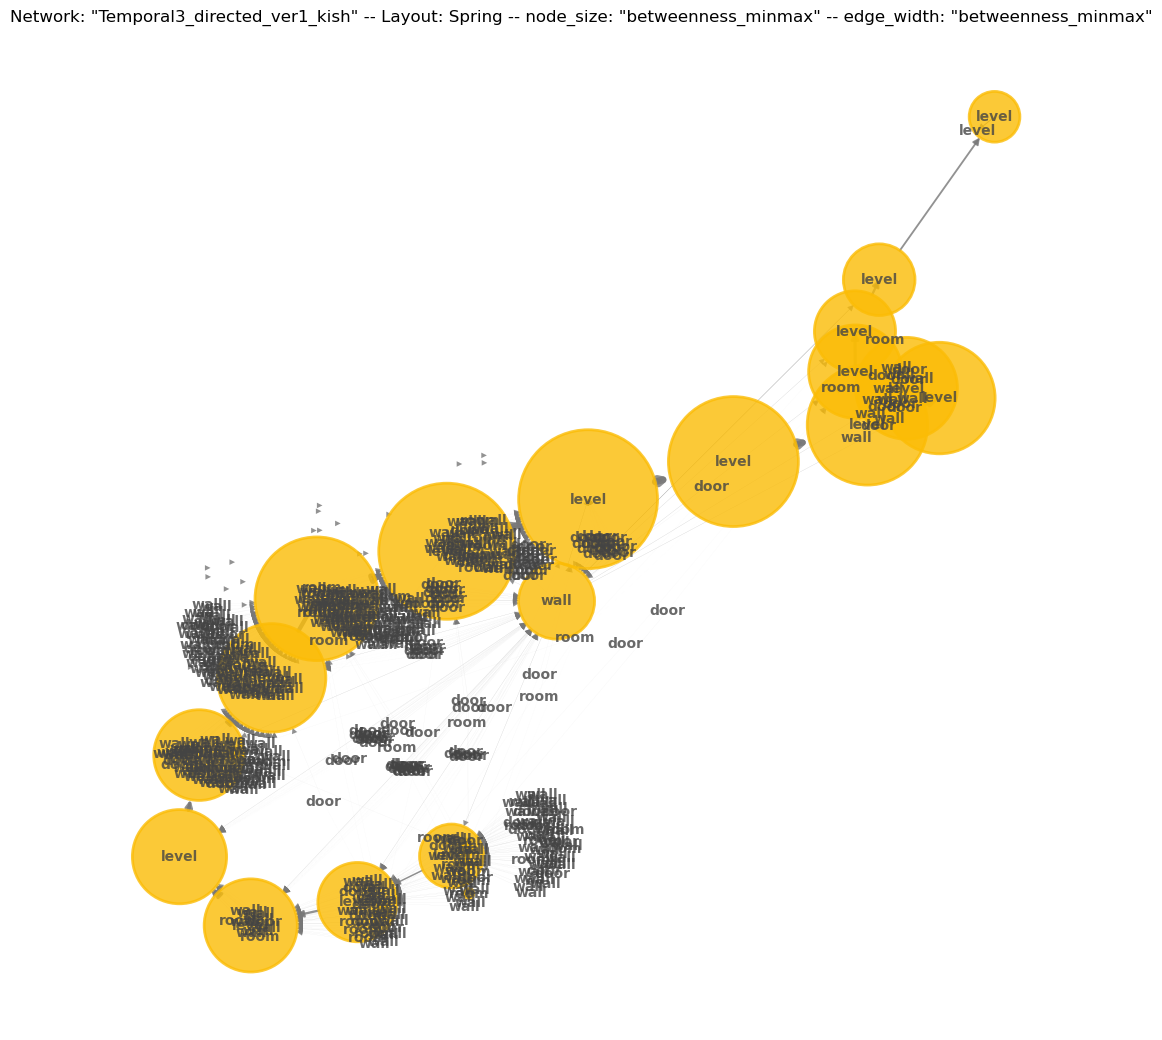

In [42]:
# --------------------------
# -- xxx
# --------------------------
pos = nx.spring_layout(G,
    seed=123,
)

# Set the visualization layout Name
layout_name = 'Spring'

# set the node attr to determine node size
# e.g., 'betweenness_minmax', 'degree_normal', 'degree_weighted', 'level', etc.
node_size_attr = 'betweenness_minmax'
# node_size_attr = 'betweenness_BAI_minmax'

# set the edge attr to determine edge width
# e.g., 'betweenness_minmax', 'betweenness_HPI_minmax', etc.
edge_width_attr = 'betweenness_minmax'
# edge_width_attr = 'betweenness_HPI_minmax'

# XXX: to increase the space between nodes, both horizontally and vertically, change figsize (changing the scale doesn't have an effect)
plt.figure(figsize=(10, 10))

nx.draw(G,
    pos=pos, # position of the nodes
    alpha= 0.8, # node and edge transparency
    # node attributes
    node_size = [size*1e4 for size in list(nx.get_node_attributes(G, node_size_attr).values())],
    ## node color
    # node_color = list(nx.get_node_attributes(G, 'color').values()),
    node_color = "#FBBC05",
    ## node shape
    node_shape = 'o',
    linewidths=2, # node border line
    ## node label
    with_labels=True,
    labels=nx.get_node_attributes(G, 'label'),
    font_color='#444',
    font_size=10, # int: universal (for nodes and edges)
    font_weight='bold',  # values: 'normal', 'bold',
    font_family='sans-serif',  # values: 'sans-serif’,
    # edge attributes
    edge_color = '#777',  # uniform gray edge
    # edge_color = list(nx.get_node_attributes(G, 'color').values()),  # is wrong
    # edge_color = edge_color_list_nx,
    ## edge width
    width = [between * 5 for between in list(nx.get_edge_attributes(G, edge_width_attr).values())],  # edge width
    ## edge style
    style='-',
    # Graph Legend
    # label='Node Type'
)

plt.title(f'Network: "{network_name}" -- Layout: {layout_name} -- node_size: "{node_size_attr}" -- edge_width: "{edge_width_attr}"')
# Export File
export_path_nx = os.path.join('outputs', 'visualizaion', f'{timestamp} - {network_name} - {layout_name} - nsize {node_size_attr} - ewidth {edge_width_attr}.pdf')
if SAVE_OUTPUTS:
    plt.savefig(export_path_nx, bbox_inches="tight")

# plt.axis("equal")  # value "equal" keeps axes so close (so not recommended)
plt.show()